# Sanity Checks: Data Ingest + Alignment

This notebook validates that:
- Market data is daily and clean (no unexpected gaps)
- Macro data is converted to daily using an explicit publication lag (no lookahead)
- Market + macro share the same calendar after alignment

**Note:** This project is a systems-level comparison. No alpha claims, no parameter optimization.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.io import load_parquet

## Load Interim Datasets

Interim datasets are saved before any feature engineering:
- `market_daily.parquet`: raw market series (SPY close, SPY volume, VIX close)
- `macro_daily.parquet`: lagged + forward-filled daily macro series

In [31]:
market = load_parquet("interim/market_daily.parquet")
macro  = load_parquet("interim/macro_daily.parquet")

market.head(), macro.head()

(            close_equity  volume_equity  vix_close
 Date                                              
 2000-01-03      145.4375        8164300  24.209999
 2000-01-04      139.7500        8089800  27.010000
 2000-01-05      140.0000       12177900  26.410000
 2000-01-06      137.7500        6227200  25.730000
 2000-01-07      145.7500        8066500  21.719999,
             CPIAUCSL   INDPRO
 Date                         
 2000-01-03     168.4  90.9618
 2000-01-04     168.4  90.9618
 2000-01-05     168.8  91.6634
 2000-01-06     168.8  91.6634
 2000-01-07     168.8  91.6634)

In [32]:
print(market.shape, macro.shape)
print("Market date range:", market.index.min(), "->", market.index.max())
print("Macro date range:", macro.index.min(), "->", macro.index.max())

assert market.index.equals(macro.index), "Market and macro indices should match after alignment."

(6527, 3) (6527, 2)
Market date range: 2000-01-03 00:00:00 -> 2025-12-15 00:00:00
Macro date range: 2000-01-03 00:00:00 -> 2025-12-15 00:00:00


## Visual Diagnostics

These plots are not “results.” They are checks for:
- plausible relationships (e.g., VIX tends to rise during equity drawdowns)
- correct frequency (daily market series)
- step-like macro behavior (monthly values forward-filled after release)

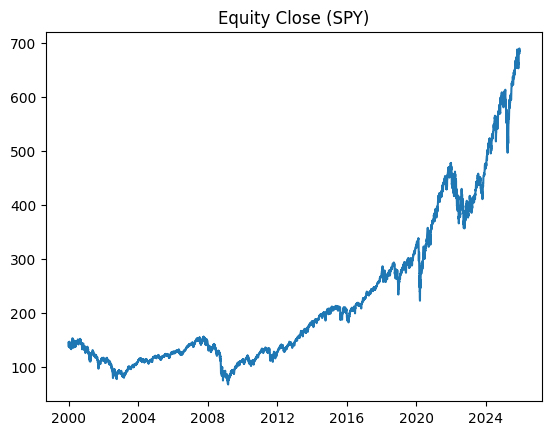

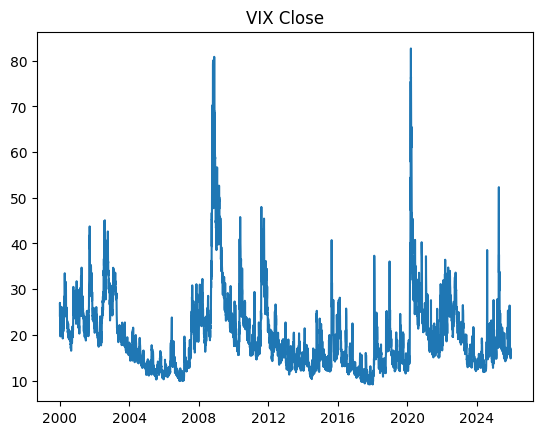

In [33]:
plt.figure()
plt.plot(market.index, market["close_equity"])
plt.title("Equity Close (SPY)")
plt.show()

plt.figure()
plt.plot(market.index, market["vix_close"])
plt.title("VIX Close")
plt.show()

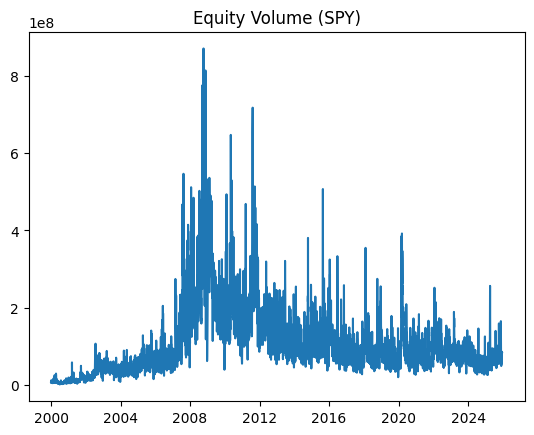

In [34]:
plt.figure()
plt.plot(market.index, market["volume_equity"])
plt.title("Equity Volume (SPY)")
plt.show()

## Macro Availability (No Lookahead)

Macro series are only “known” after a conservative publication lag.
We expect the daily macro series to:
- change infrequently (monthly step behavior)
- never jump early relative to its release timing

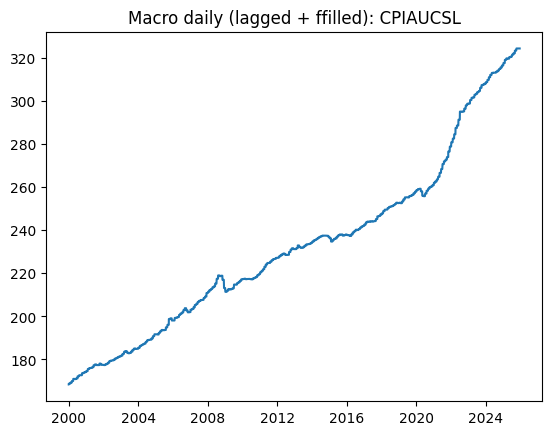

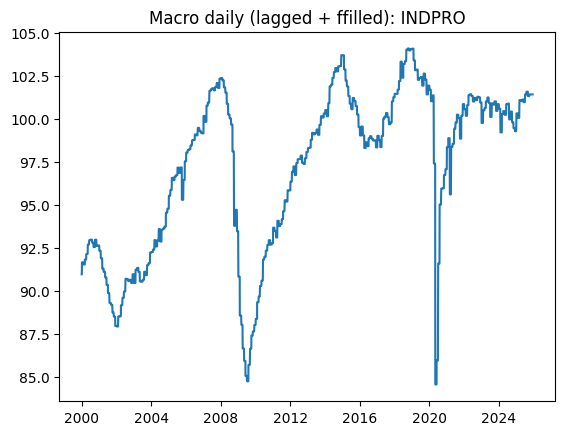

In [35]:
for col in macro.columns:
    plt.figure()
    plt.plot(macro.index, macro[col])
    plt.title(f"Macro daily (lagged + ffilled): {col}")
    plt.show()

In [36]:
print("Initial NaNs per macro series:\n", macro.isna().sum())

Initial NaNs per macro series:
 CPIAUCSL    0
INDPRO      0
dtype: int64
